In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 

In [3]:
df=pd.read_csv('churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.shape

(10000, 14)

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x28e81989010>,
 'caps': [<matplotlib.lines.Line2D at 0x28e819a6ad0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x28e8198a010>],
 'medians': [<matplotlib.lines.Line2D at 0x28e819b02d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e819b0e10>],
 'means': []}

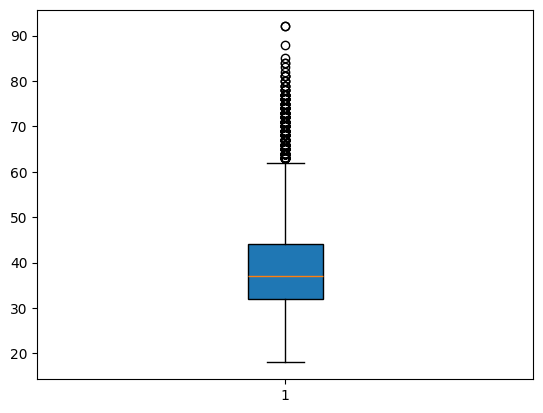

In [12]:
plt.boxplot(df['Age'],patch_artist=True )

In [13]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = (Q1 - 1.5 * IQR)
    upper_bound = (Q3 + 1.5 * IQR)
    filter = (data[column] <= upper_bound) & (data[column] >= lower_bound)
    df = data[filter]
    return df

In [14]:
df = remove_outliers(df , 'Age')
df.shape[0]

9641

In [15]:
churn_counts=df['Exited'].value_counts()
print(f'------------Churn Counts-----------------\n{churn_counts}')#Imbalanced Data
churn_ratio=df['Exited'].value_counts(normalize=True)*100
print(f'\n------------------------------Churn Ratio--------------------------------\n{churn_ratio}')

------------Churn Counts-----------------
Exited
0    7677
1    1964
Name: count, dtype: int64

------------------------------Churn Ratio--------------------------------
Exited
0    79.628669
1    20.371331
Name: proportion, dtype: float64


Exited             1.000000
Age                0.358888
Balance            0.116932
EstimatedSalary    0.011120
Tenure            -0.013832
CreditScore       -0.025456
NumOfProducts     -0.050396
Name: Exited, dtype: float64


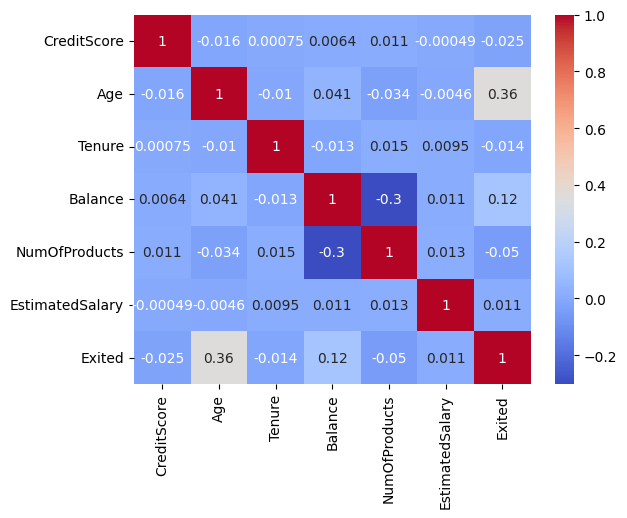

In [16]:
# اختيار الأعمدة الرقمية
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# حساب correlation مع الـ target
correlation = df[numeric_features + ['Exited']].corr()
print(correlation['Exited'].sort_values(ascending=False))

# رسم heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [17]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# تحويل الأعمدة التصنيفية
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
categorical_cols = ['Geography','HasCrCard','IsActiveMember']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [20]:
# تقسيم البيانات
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
# Standardization (اختياري)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# 1. تعريف SMOTE وتطبيقه على بيانات التدريب المُقاسة (Scaled)
smote = SMOTE(random_state=42)

print(f"y_train before SMOTE: \n{y_train.value_counts()}")

# 2. تطبيق SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\ny_train after SMOTE: \n{y_train_smote.value_counts()}")
print("\n -------------------Done (50/50)-----------------------------")

y_train before SMOTE: 
Exited
0    6141
1    1571
Name: count, dtype: int64

y_train after SMOTE: 
Exited
0    6141
1    6141
Name: count, dtype: int64

 -------------------Done (50/50)-----------------------------


Accuracy of Model:72.99%

------------------------------------------------------------------------------------
AUC-ROC Score:0.8015
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1536
           1       0.41      0.73      0.52       393

    accuracy                           0.73      1929
   macro avg       0.66      0.73      0.67      1929
weighted avg       0.81      0.73      0.75      1929



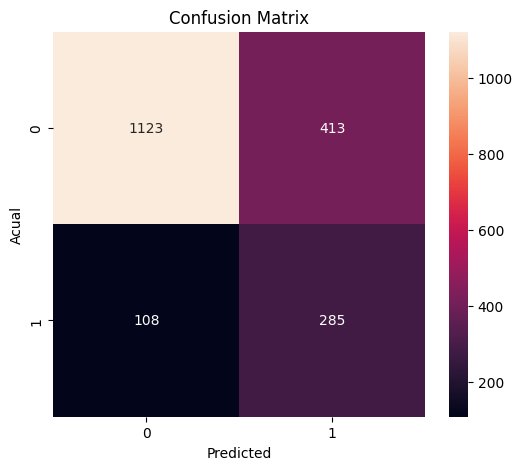

In [31]:
log_model=LogisticRegression(random_state=42,max_iter=1000)
log_model.fit(X_train_smote,y_train_smote)
y_pred_log=log_model.predict(X_test)
y_pred_proba_log=log_model.predict_proba(X_test)[:,1]
accuracy=accuracy_score(y_test,y_pred_log)*100
print(f'Accuracy of Model:{accuracy:.2f}%')
print('\n------------------------------------------------------------------------------------')
print(f'AUC-ROC Score:{roc_auc_score(y_test,y_pred_proba_log):.4f}')
print(classification_report(y_test,y_pred_log))
cm_smote=confusion_matrix(y_test,y_pred_log)
plt.figure(figsize=(6,5))
sns.heatmap(cm_smote,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Acual")
plt.title("Confusion Matrix")
plt.show()
#print('\nArray is:')
#print(cm_smote)

In [69]:
# تدريب RandomForest ,max_depth=10,

rf = RandomForestClassifier(n_estimators=900,class_weight='balanced',random_state=42)
rf.fit(X_train_smote,y_train_smote)

,n_estimators,900
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
# التنبؤ
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1536
           1       0.64      0.60      0.62       393

    accuracy                           0.85      1929
   macro avg       0.77      0.76      0.76      1929
weighted avg       0.85      0.85      0.85      1929

AUC-ROC Score: 0.8641700129877014
------------------Accuracy----------------------------------
85.06998444790047


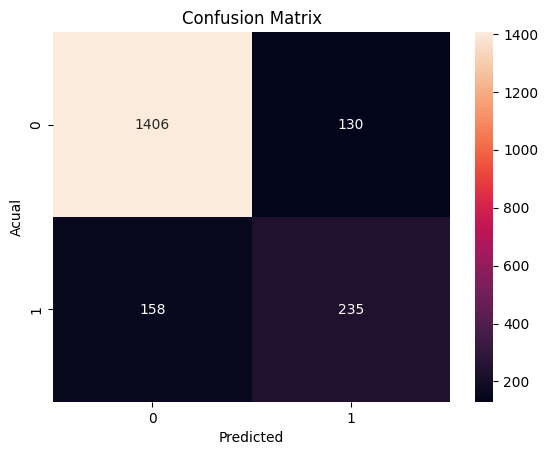

In [71]:
# تقييم الأداء
print(classification_report(y_test, y_pred))

print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
accuracy=accuracy_score(y_test,y_pred)*100
print(f'------------------Accuracy----------------------------------\n{accuracy}')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Acual")
plt.title("Confusion Matrix")
plt.show()

In [72]:
print(y_test.value_counts())

Exited
0    1536
1     393
Name: count, dtype: int64


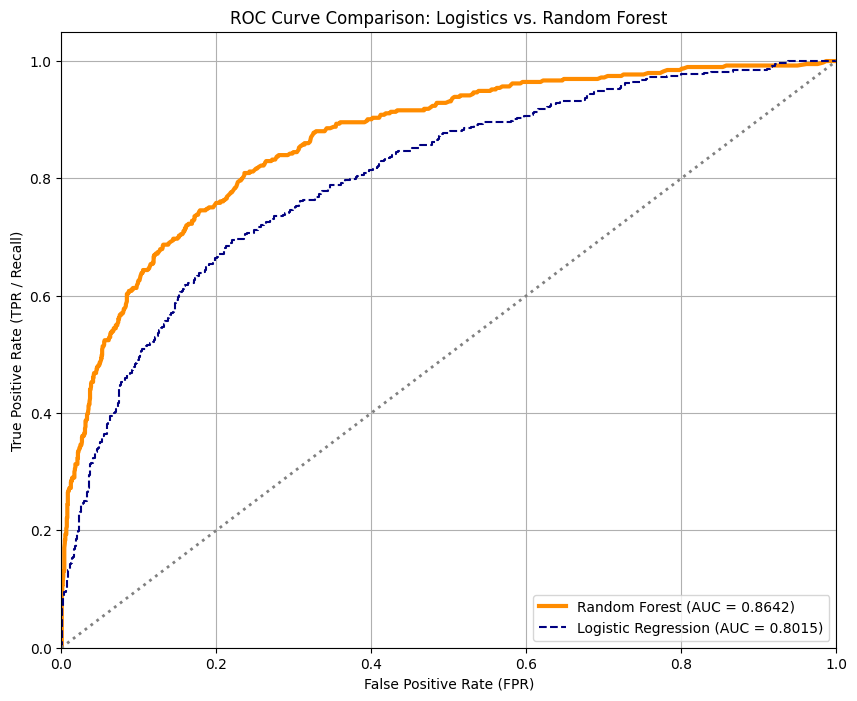

In [73]:
# 1. حساب FPR و TPR لنموذج الانحدار اللوجستي
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
auc_log = roc_auc_score(y_test, y_pred_proba_log)

# 2. حساب FPR و TPR لنموذج Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
auc_rf = roc_auc_score(y_test, y_pred_proba)

# 3. رسم المنحنيات للمقارنة
plt.figure(figsize=(10, 8))

# رسم Random Forest (الفائز)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=3,
         label=f'Random Forest (AUC = {auc_rf:.4f})')

# رسم الانحدار اللوجستي
plt.plot(fpr_log, tpr_log, color='navy', lw=1.5, linestyle='--',
         label=f'Logistic Regression (AUC = {auc_log:.4f})')

# خط التنبؤ العشوائي (Baseline)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve Comparison: Logistics vs. Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()